<a href="https://colab.research.google.com/github/AravindBiswas/MyStudy/blob/master/TimeSeries_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



In [12]:
# Load data
data = pd.read_csv('SeaPlaneTravel.csv', header=0)


In [13]:
# Since the Month column is in '2003-01' format, pandas will automatically convert it to datetime
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])










In [14]:
# Set Month as index
data.set_index(data.columns[0], inplace=True)

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


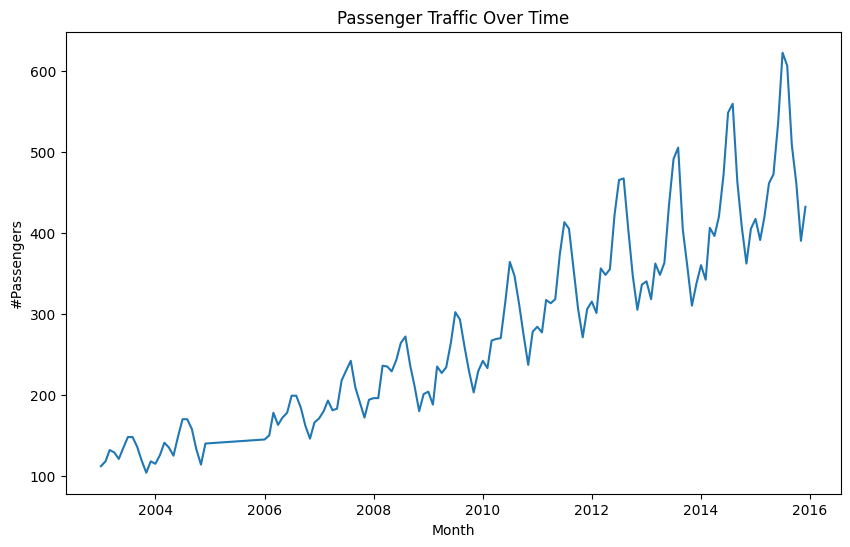

In [16]:
# Plot original data
plt.figure(figsize=(10,6))
plt.plot(data.iloc[:, 0])
plt.title('Passenger Traffic Over Time')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.show()

In [18]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -524.549
Date:                Sat, 17 May 2025   AIC                           1061.098
Time:                        12:56:21   BIC                           1077.515
Sample:                             0   HQIC                          1067.760
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3558      0.092      3.854      0.000       0.175       0.537
ar.L2         -0.2644      0.109     -2.422      0.015      -0.478      -0.050
ar.L3          0.0847      0.078      1.089      0.2

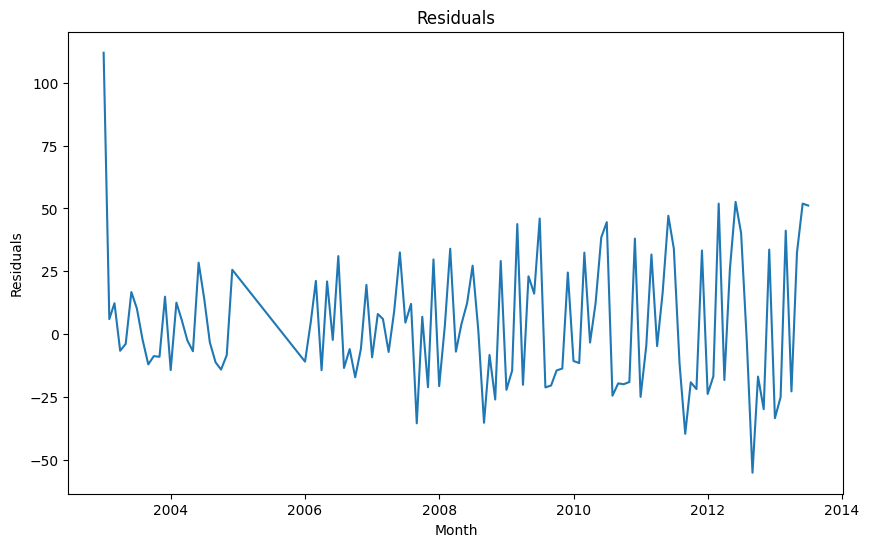

<Figure size 1000x600 with 0 Axes>

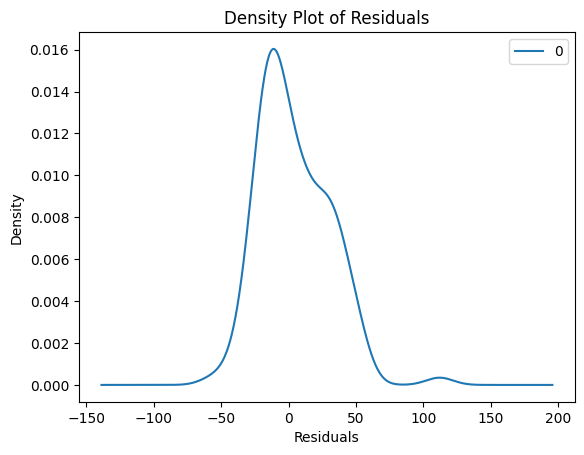

Residuals Description:
                0
count  115.000000
mean     4.229784
std     25.891580
min    -55.195497
25%    -14.432059
50%     -2.601878
75%     23.752902
max    112.000000


In [19]:
# Build and fit ARIMA model
model = ARIMA(train_data.iloc[:, 0], order=(5,1,0))
try:
    model_fit = model.fit()
except Exception as e:
    print(f"An error occurred: {e}")
else:
    # Print out the statistics of the model
    print(model_fit.summary())

    # Plot residual diagnostics
    residuals = pd.DataFrame(model_fit.resid)
    plt.figure(figsize=(10,6))
    plt.plot(residuals)
    plt.title('Residuals')
    plt.xlabel('Month')
    plt.ylabel('Residuals')
    plt.show()

    plt.figure(figsize=(10,6))
    residuals.plot(kind='kde')
    plt.title('Density Plot of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.show()

    print('Residuals Description:')
    print(residuals.describe())



In [21]:
    # Forecast passenger traffic for the next 12 months
    forecast_steps = len(test_data)
    forecast = model_fit.forecast(steps=forecast_steps)





/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


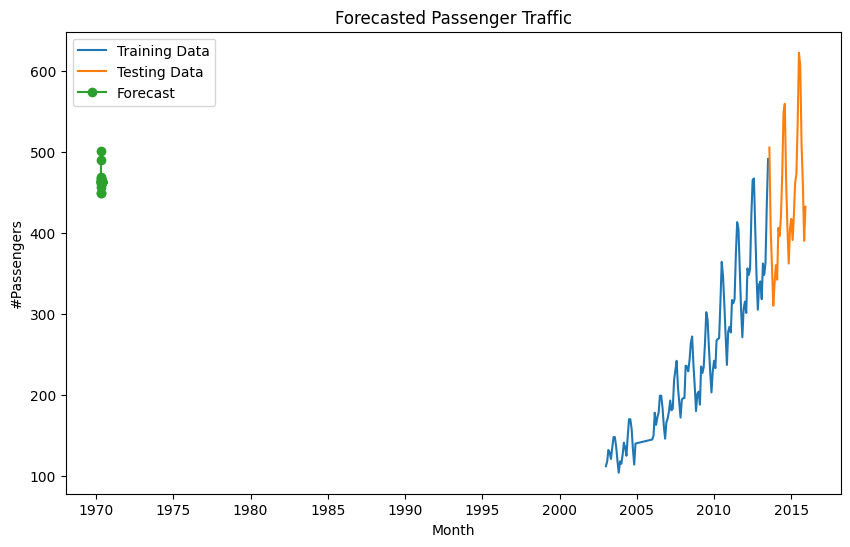

In [22]:
    # Plot forecasted values
    plt.figure(figsize=(10,6))
    plt.plot(train_data.iloc[:, 0], label='Training Data')
    plt.plot(test_data.iloc[:, 0], label='Testing Data')
    plt.plot(np.arange(len(train_data), len(train_data) + forecast_steps), forecast, label='Forecast', marker='o')
    plt.title('Forecasted Passenger Traffic')
    plt.xlabel('Month')
    plt.ylabel('#Passengers')
    plt.legend()
    plt.show()

In [23]:
    # Evaluate model performance using Mean Squared Error (MSE)
    mse = np.mean((forecast - test_data.iloc[:, 0])**2)
    print('Model MSE: %.3f' % mse)

Model MSE: nan
